In [1]:
%matplotlib inline

In [13]:
import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots.mplstyle')
import sys
sys.path.append('/home/apizzuto/Nova/python3/scripts/')
from plotting import GRECOPlots
import matplotlib.pyplot as plt
import numpy as np

Setting up Analysis for:
GRECOv2.4
Setting up GRECOv2.4...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


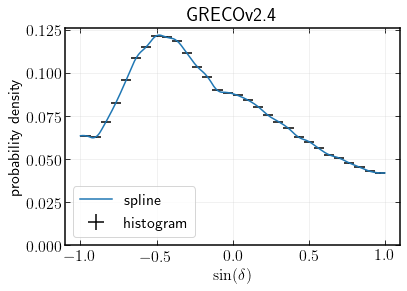

In [3]:
gplots = GRECOPlots()
gplots.declination_pdf()

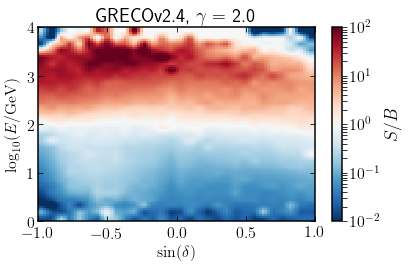

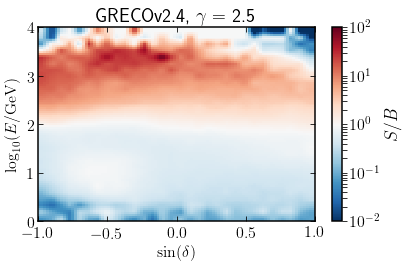

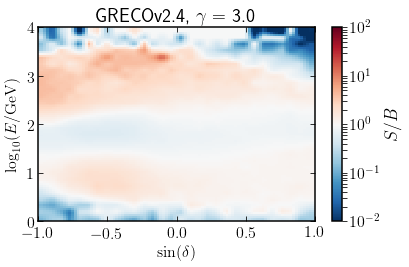

In [4]:
gplots.energy_pdf()

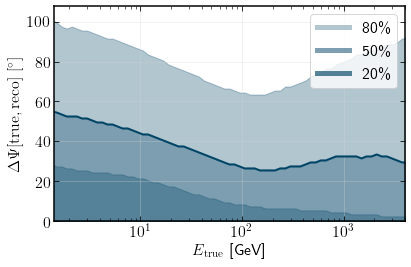

In [5]:
gplots.angular_error_plot()

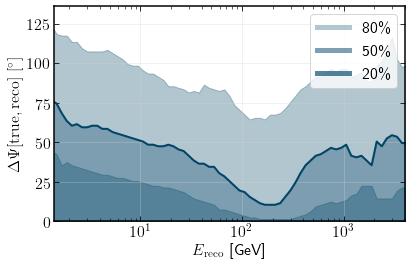

In [6]:
gplots.angular_error_plot(true_energy=False)

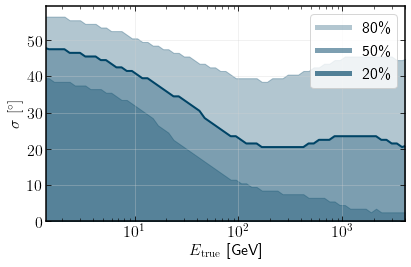

In [7]:
gplots.angular_error_plot(true_error=False)

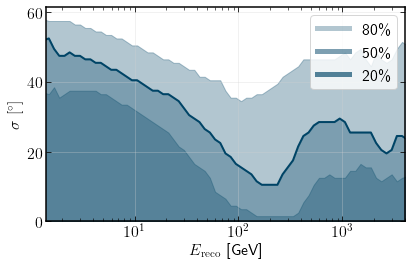

In [8]:
gplots.angular_error_plot(true_error=False, true_energy=False)

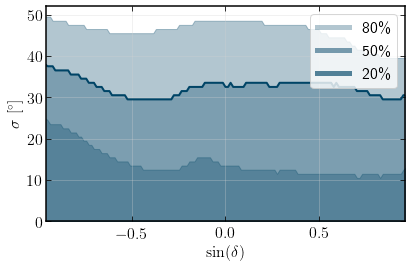

In [9]:
gplots.errors_vs_declination()

NameError: name 'mc' is not defined

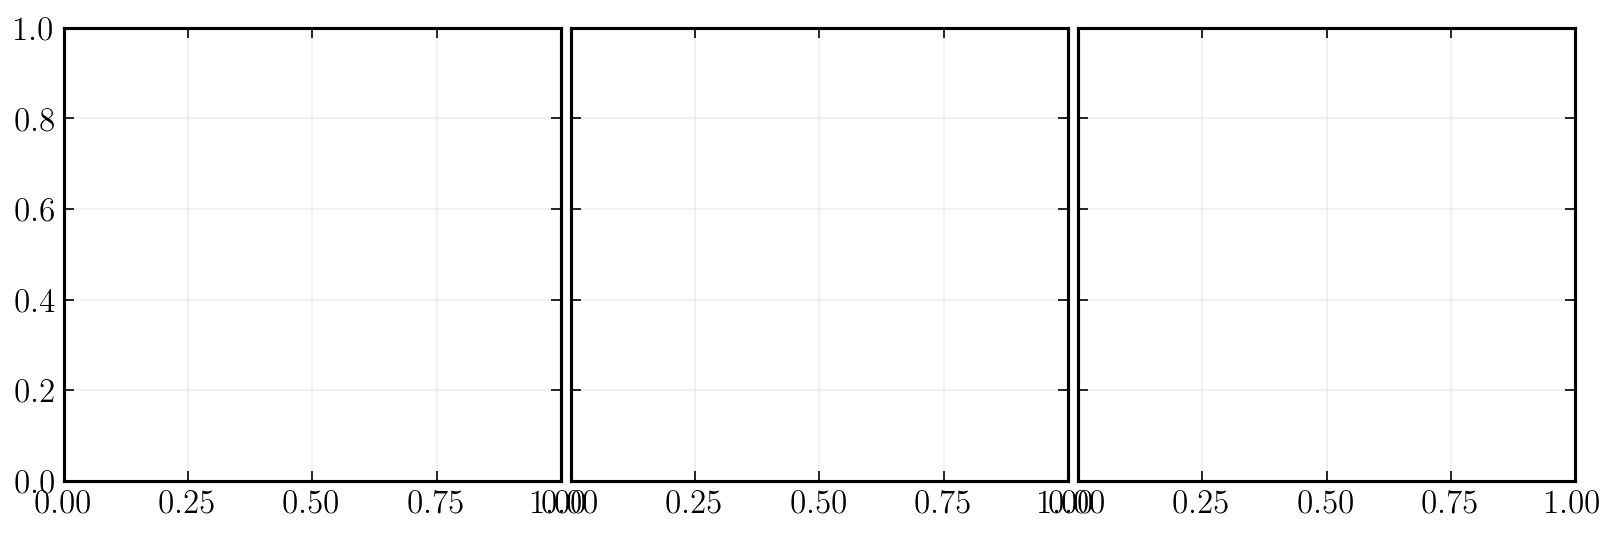

In [14]:
fig, aaxs = plt.subplots(nrows=1, ncols=3, figsize=(13,4), dpi=150, sharey=True)
plt.subplots_adjust(hspace=0.02, wspace=0.02)
axs = np.ravel(aaxs)
for ii, gamma in enumerate([2.0, 2.5, 3.0]):
    for e_cut in [0.0, 0.5, 1.0]:
        mc_msk = mc['logE'] > e_cut
        mc_cut = mc[mc_msk]

        delta_gamma = -gamma + 1.
        axs[ii].hist(mc_cut['trueE'], bins = np.logspace(-0.5, 4.0, 31), 
                 weights = mc_cut['ow'] * np.power(mc_cut['trueE'], delta_gamma) / mc_cut['trueE'],
                histtype = 'step', linewidth = 2., label=r'$\min\log_{10}(E) = $' + f" {e_cut:.1f}")

    axs[ii].set_yscale('log')
    axs[ii].set_xscale('log')
    axs[ii].set_xlim(4e-1, 3e3)
    axs[ii].set_xlabel(r'$E_{\nu}$ (GeV)', fontsize = 20)
    if ii == 0:
        axs[ii].set_ylabel('$N$ per bin (au)', fontsize=20)
    if ii == 0:
        axs[ii].legend(loc=4, fontsize=14, frameon=False)
    axs[ii].set_title(r'$\gamma = $' + f"{gamma:.1f}")
plt.show()

In [ ]:
for cut in [0.0, 0.5, 1.0]:
    mc_msk = sig.log10energy > cut
    masked_sig = sig[mc_msk]
    print(len(masked_sig))

    fig, ax = plt.subplots()
    h = hl.hist(masked_sig.dpsi/masked_sig.sigma * 1.0, 
                masked_sig.oneweight*masked_sig.true_energy**-2,
                bins=np.r_[:180:.05]).normalize()
    hl.plot1d(ax, h, crosses=True, label=r'$E^{-2}$ MC')
    x = h.centers[0]
    ax.plot(x, stats.rayleigh.pdf(x), label='Rayleigh expectation')
    ax.set_xlim(0, 5)
    ax.set_ylim(0)
    ax.set_xlabel(r'$\Delta\Psi/\sigma$')
    ax.set_ylabel(r'probability density')
    ax.legend()
    plt.tight_layout()
    
    plt.show()